In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import LabelEncoder, StandardScaler      
from sklearn.ensemble import RandomForestClassifier               
from sklearn.linear_model import LogisticRegression                
from sklearn.tree import DecisionTreeClassifier                   
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

## step1 data basic information 

In [4]:
print('train data information:',train_data.info())
print('test data information:',test_data.info())
print('train description:',train_data.describe())
print('test description:',test_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train data information: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

In [5]:
print("\ntrain data is null：")
print(test_data.isnull().sum())
print("\ntrain data first 5 row：")
print(test_data.head())
print("\ntest data is null：")
print(test_data.isnull().sum())
print("\ntest data first 5 row：")
print(test_data.head())


train data is null：
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

train data first 5 row：
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0  

## step2 EDA and data visualization

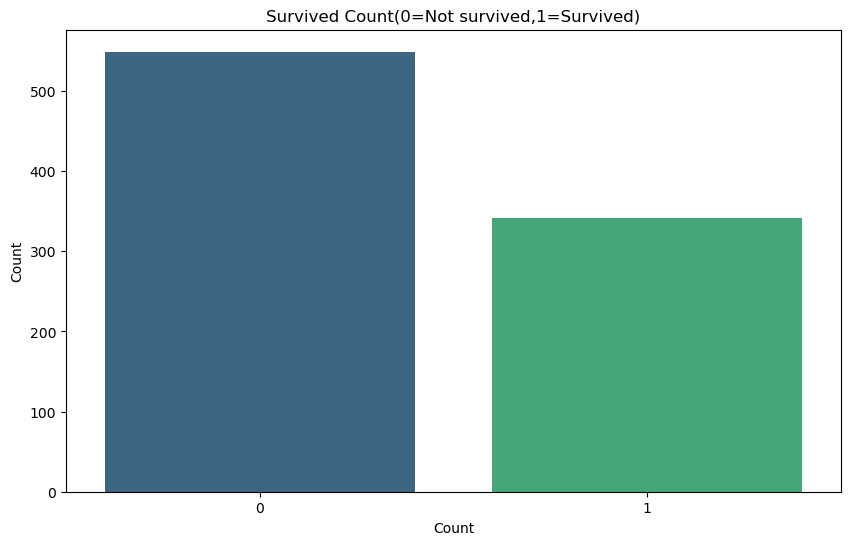

      Sex  Survived
0  female  0.742038
1    male  0.188908


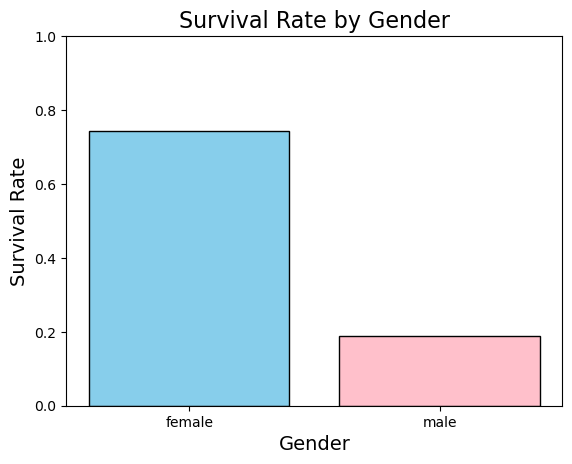

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


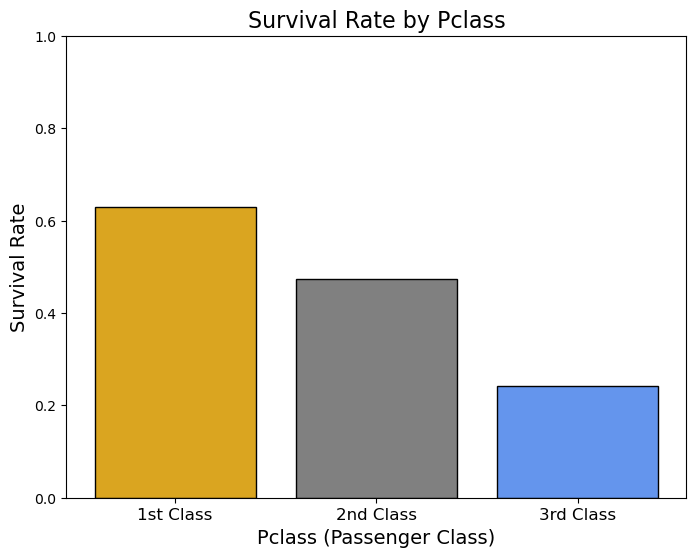

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


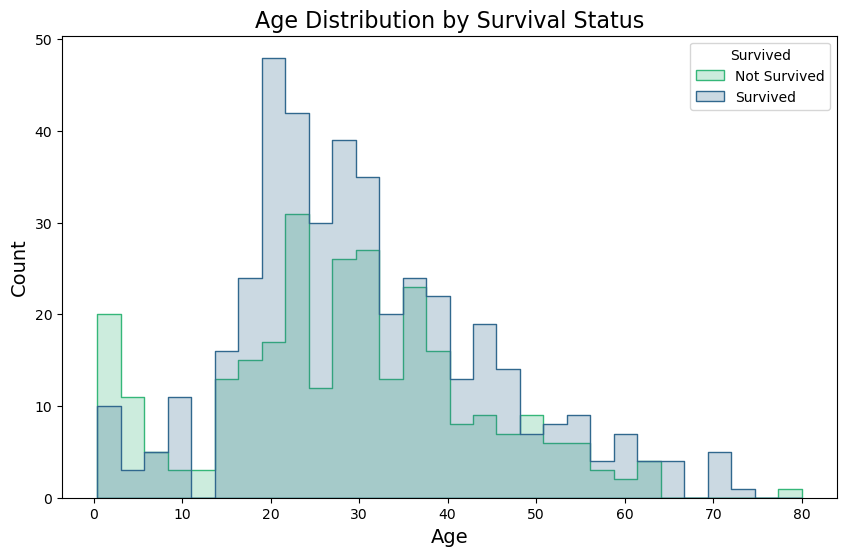

        Fare  Survived
0      Cheap  0.376579
1   Mediocre  0.647059
2  Expensive  1.000000


/var/folders/tc/c22rmm2s73sdzhk432r5fkg00000gn/T/ipykernel_53937/1551875350.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survived=fare_survived_df.groupby('Fare',as_index=False).mean()


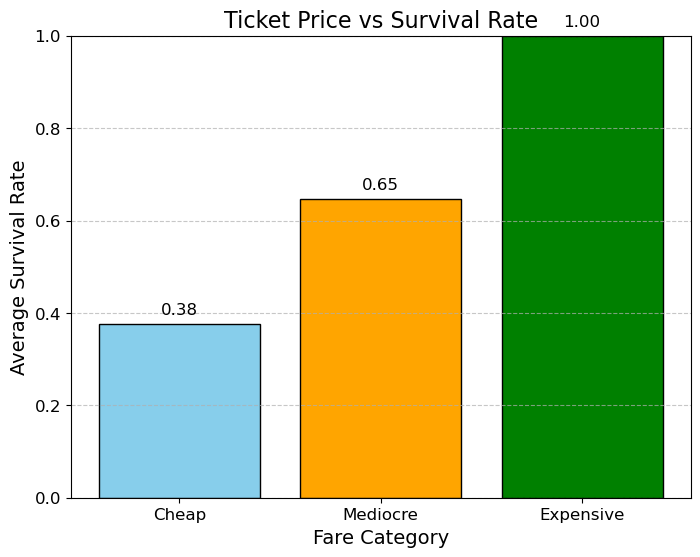

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


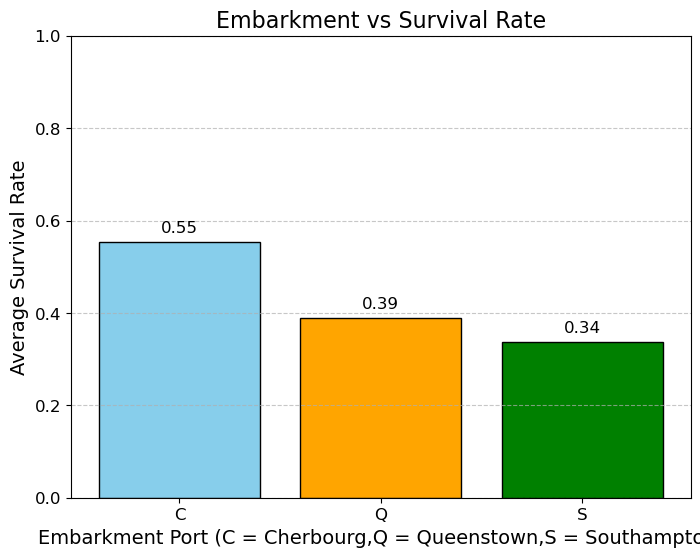

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


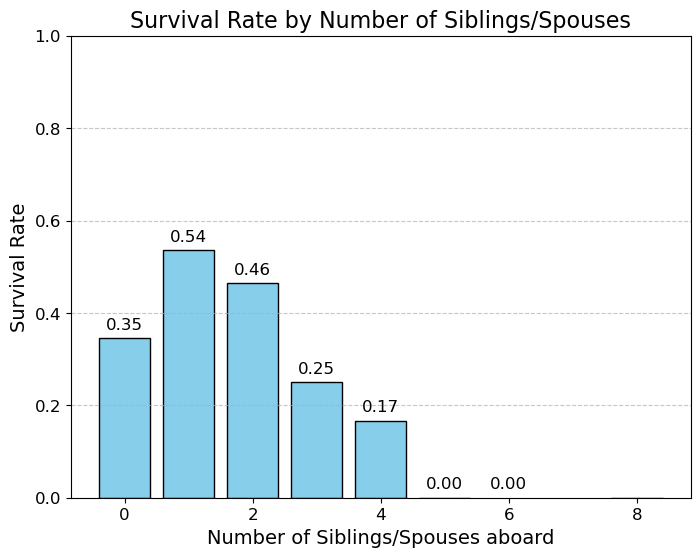

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


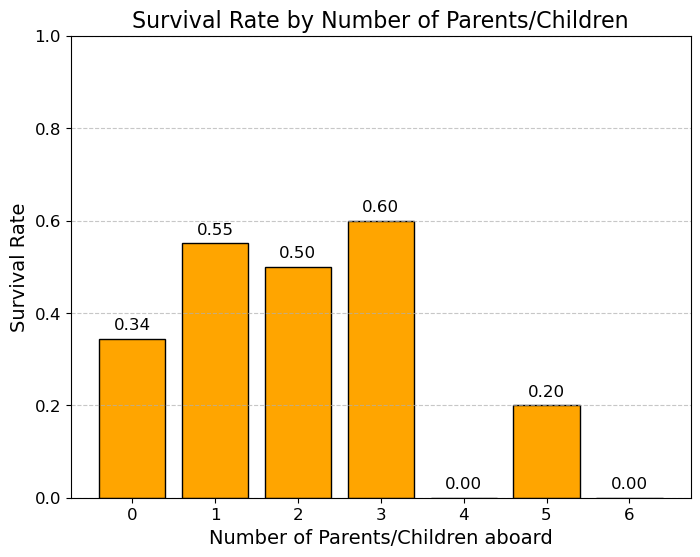

In [7]:
plt.figure(figsize=(10,6))
# surivived vs not survived 
sns.countplot(x='Survived',data=train_data,palette='viridis')
plt.title('Survived Count(0=Not survived,1=Survived)')
plt.xlabel('Count')
plt.ylabel('Count')
plt.show()

# sex vs survived
sex_survived=train_data[['Sex','Survived']].groupby('Sex',as_index=False).mean()
print(sex_survived)
plt.bar(sex_survived['Sex'],sex_survived['Survived'],color=['skyblue','pink'],edgecolor='black')
plt.title("Survival Rate by Gender",fontsize=16)
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Survival Rate",fontsize=14)
plt.ylim(0, 1)
plt.show()

# pcalss vs survived
cls_survived=train_data[['Pclass','Survived']].groupby('Pclass',as_index=False).mean()
print(cls_survived)
plt.figure(figsize=(8, 6))
plt.bar(cls_survived['Pclass'], cls_survived['Survived'], color=['goldenrod','gray','cornflowerblue'],edgecolor='black')
plt.title("Survival Rate by Pclass",fontsize=16)
plt.xlabel("Pclass (Passenger Class)",fontsize=14)
plt.ylabel("Survival Rate",fontsize=14)
plt.xticks(ticks=cls_survived['Pclass'],labels=['1st Class','2nd Class','3rd Class'],fontsize=12)
plt.ylim(0, 1) 
plt.show()

# age vs surivived
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data,x='Age',hue='Survived',bins=30,kde=False,palette='viridis',element="step")
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.legend(title='Survived',labels=['Not Survived','Survived'])
plt.show()

#fare vs survived
fare_survived_df=pd.DataFrame({'Fare':pd.cut(train_data['Fare'],3,labels=['Cheap','Mediocre','Expensive']),'Survived':train_data['Survived']})
fare_survived=fare_survived_df.groupby('Fare',as_index=False).mean()
print(fare_survived)
plt.figure(figsize=(8, 6))
plt.bar(fare_survived['Fare'], fare_survived['Survived'], 
        color=['skyblue','orange','green'],edgecolor='black')
plt.title("Ticket Price vs Survival Rate",fontsize=16)
plt.xlabel("Fare Category",fontsize=14)
plt.ylabel("Average Survival Rate",fontsize=14)
plt.ylim(0, 1)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)  

for i, rate in enumerate(fare_survived['Survived']):
    plt.text(i, rate + 0.02, f"{rate:.2f}",ha='center',fontsize=12)

plt.show()

# Embarkment vs survival 
embarkment_survived=train_data[['Embarked','Survived']].groupby('Embarked',as_index=False).mean()
print(embarkment_survived)
plt.figure(figsize=(8, 6))
plt.bar(embarkment_survived['Embarked'],embarkment_survived['Survived'], 
        color=['skyblue','orange','green'],edgecolor='black')

plt.title("Embarkment vs Survival Rate", fontsize=16)
plt.xlabel("Embarkment Port (C = Cherbourg,Q = Queenstown,S = Southampton)",fontsize=14)
plt.ylabel("Average Survival Rate",fontsize=14)
plt.ylim(0, 1) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--', alpha=0.7) 

for i, rate in enumerate(embarkment_survived['Survived']):
    plt.text(i, rate + 0.02,f"{rate:.2f}",ha='center',fontsize=12)
plt.show()

# siblings vs survived
sibsp_survived = train_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()
print(sibsp_survived)

plt.figure(figsize=(8, 6))
plt.bar(sibsp_survived['SibSp'],sibsp_survived['Survived'],color='skyblue',edgecolor='black')
plt.title('Survival Rate by Number of Siblings/Spouses',fontsize=16)
plt.xlabel('Number of Siblings/Spouses aboard',fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y',linestyle='--',alpha=0.7)

for i, rate in enumerate(sibsp_survived['Survived']):
    plt.text(i, rate + 0.02, f"{rate:.2f}",ha='center',fontsize=12)
plt.show()

# parch vs survived
parch_survived = train_data[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()
print(parch_survived)

plt.figure(figsize=(8, 6))
plt.bar(parch_survived['Parch'], parch_survived['Survived'],color='orange',edgecolor='black')
plt.title('Survival Rate by Number of Parents/Children',fontsize=16)
plt.xlabel('Number of Parents/Children aboard',fontsize=14)
plt.ylabel('Survival Rate',fontsize=14)
plt.ylim(0, 1)  
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)

for i, rate in enumerate(parch_survived['Survived']):
    plt.text(i, rate + 0.02, f"{rate:.2f}", ha='center', fontsize=12)

plt.show()




Base on above reults: 1.Females have significantly higher survival rate.
                      2.Better Passenger class had better survial mean.
                      3.More survived rate around age 18-20.
                      4.More expensive ticket has better survival rate.
                      5.Embarkment C seems to have bette survival rate.
                      6.More siblings tend to result in less survival rate.
                      7.Having Parents or Children has slightly better rate.

## step3 data processing and cleaning 

In [10]:
# train data
# fare missing value 
fare_medians=train_data.groupby('Pclass')['Fare'].median()
train_data['Fare']=train_data.apply(lambda row:fare_medians[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'],axis=1)

In [11]:
#age missing value
#extract ttile from name 
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print("Extracted Titles:")
print(train_data['Title'].value_counts())
# classify title 
title_mapping = {
    "Mr": "Mr",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Master": "Master",
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs",
    "Dr": "Other",
    "Major": "Other",
    "Col": "Other",
    "Capt": "Other",
    "Sir": "Other",
    "Don": "Other",
    "Jonkheer": "Other",
    "Rev": "Other",
    "the Countess": "Royalty",
    "Lady": "Royalty",
}
train_data['Title'] = train_data['Title'].map(title_mapping)
print(train_data['Title'].value_counts())

# age missing value 
age_medians=train_data.groupby(['Pclass','Sex','Title'])['Age'].median()
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'],row['Sex'],row['Title']]
    else:
        return row['Age']
train_data['Age']=train_data.apply(fill_age,axis=1)

Extracted Titles:
Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
Title
Mr         517
Miss       185
Mrs        126
Master      40
Other       21
Royalty      2
Name: count, dtype: int64


In [12]:
# cabin missing value 
train_data=train_data.drop(columns=['Cabin'])

In [13]:
missing_train_data=train_data.isnull().sum()
print(missing_train_data)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64


In [14]:
# test data
# age missing value 
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(test_data['Title'].value_counts())
test_data['Title'] = test_data['Title'].replace({
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 
    'Dr': 'Other', 'Major': 'Other', 'Col': 'Other',
    'Capt': 'Other', 'Sir': 'Other', 'Don': 'Other',
    'Jonkheer': 'Other', 'Rev': 'Other', 'Dona': 'Royalty'
})
def fill_age_test(row):
    if pd.isnull(row['Age']):
        return age_medians[row['Pclass'], row['Sex'], row['Title']]
    else:
        return row['Age']

test_data['Age'] = test_data.apply(fill_age_test, axis=1)

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


In [15]:
# fare missing value 
fare_medians_test = test_data.groupby('Pclass')['Fare'].median()  
test_data['Fare'] = test_data.apply(
    lambda row: fare_medians_test[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1
)

In [16]:
test_data=test_data.drop(columns=['Cabin'])

In [17]:
missing_test_data=test_data.isnull().sum()
print(missing_test_data)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


## step4 feature engineering 

In [53]:
# classify levels for age and fare
train_data['Age_bin']=pd.cut(train_data['Age'],bins=5,labels=False)
test_data['Age_bin']=pd.cut(test_data['Age'],bins=5,labels=False)
train_data['Fare_bin'] = pd.cut(train_data['Fare'], bins=3, labels=['Cheap', 'Mediocre', 'Expensive'])
test_data['Fare_bin'] = pd.cut(test_data['Fare'], bins=3, labels=['Cheap', 'Mediocre', 'Expensive'])

In [73]:
# label encoding 
le = LabelEncoder()
for col in ['Sex','Pclass','Embarked','Title','Fare_bin']:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

In [75]:
print(train_data.dtypes)
print(test_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
Title            int64
Age_bin          int64
Fare_bin         int64
dtype: object
PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
Title            int64
Age_bin          int64
Fare_bin         int64
dtype: object


## step5 Random Forest model

In [91]:
X = train_data.drop(columns=['Survived','PassengerId','Name', 'Ticket'])
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train size
print('Train size:', X_train.shape, y_train.shape)
print('Val size:', X_val.shape, y_val.shape)

#test size
X_test=test_data.drop(columns=['PassengerId', 'Name', 'Ticket'])
print('Test size:',X_test.shape)

Train size: (712, 10) (712,)
Val size: (179, 10) (179,)
Test size: (418, 10)


Accuracy score is :0.8101
Confusion Matrix:

[[94 16]
 [18 51]]


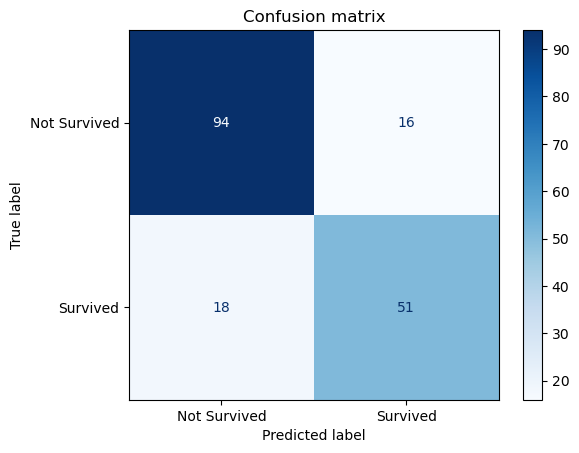

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [109]:
# Random Forest model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42).fit(X_train,y_train)
y_val_pred=rf_model.predict(X_val)

rf_accuracy=accuracy_score(y_val,y_val_pred)
print(f'Accuracy score is :{rf_accuracy:.4f}')

rf_cm=confusion_matrix(y_val,y_val_pred)
print('Confusion Matrix:\n')
print(rf_cm)

rf_disp=ConfusionMatrixDisplay(confusion_matrix=rf_cm,display_labels=["Not Survived", "Survived"])
rf_disp.plot(cmap='Blues')
rf_disp.ax_.set_title('Confusion matrix')
plt.show()

print(classification_report(y_val,y_val_pred))

Accuracy is 0.8101, not bad!

In [113]:
# tune parameters to find best scores
param_grid = {
    'n_estimators':[100, 200, 300, 500],
    'max_depth':[5, 10, 15, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 5, 10],
    'max_features':['sqrt', 'log2', None]
}


rf_model_grid=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(estimator=rf_model_grid, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


print('Best Parameters:',grid_search.best_params_)
print('Best Cross-Validation Accuracy:',grid_search.best_score_)

best_rf_model_grid = grid_search.best_estimator_
y_val_pred = best_rf_model_grid.predict(X_val)
print('Validation Accuracy:',accuracy_score(y_val, y_val_pred))
print('Confusion Matrix:\n',confusion_matrix(y_val, y_val_pred))
print('Classification Report:\n',classification_report(y_val, y_val_pred))

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.827331823106471
Validation Accuracy: 0.8156424581005587
Confusion Matrix:
 [[99 11]
 [22 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



The score increased from 0.8101 up to 0.8156, only 0.55% improvement.

In [123]:
# predict test data and save it 
y_test_pred=rf_model.predict(X_test)

rf_test_submission=pd.DataFrame({'PassengerId': test_data_encoded['PassengerId'],
                                'Survived': y_test_pred})
rf_test_submission.to_csv('rf_test_submission',index=False)
rf_test_submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
